# Result

## loading data 

In [21]:
import warnings
warnings.filterwarnings("ignore")   

In [19]:
# load data
import PriceLoader as plder
import warnings
warnings.filterwarnings("ignore")  

plr = plder.PriceLoader(start = "2004-12-31",# since i use previous day as ADV
                 end = "2025-01-01",
                 outdir = "data/adjclose",
                 sleep = 1.2) 

data = plr.loader()

# fetch data into files
plr.fetch_data(data)


[*********************100%***********************]  1 of 1 completed


## Stretagy

In [20]:
import yfinance as yf
import BenchmarkStrategy as bs
import pandas as pd
import MovingAverageStrategy as MAS
import VolatilityBreakoutStrategy as VBS
import MACDStrategy as MACDS
import RSIStrategy as RSIS
initial_capital = 1000000
# get ticker
tickers = plr.covered_tickers

# benchmark strategies
static = bs.static_stratgy(1_000_000, tickers, pr=0.05).run()


# moving average
maStrategy = MAS.MA(initial_capital=initial_capital,
                    s_window= 20,
                    l_window=50,
                    tickers= tickers)
maStrategy.run()

# volatility breakout strategy
vb  = VBS.VolatilityBreakoutStrategy(initial_capital, tickers)
vb.run()
# MACDS
mac = MACDS.MACDStrategy(initial_capital, tickers)
mac.run()

# RSIS
rsi = RSIS.RSIStrategy(initial_capital, tickers, threshold=30, event_based=True)
rsi.run()


### benchmark strategy

In [ ]:
# static
holdings, cash, equity = static.access_portfolio()
pf = pd.concat(
    {'holdings': holdings, 'cash': cash, 'equity': equity},
    axis=1
).sort_index()

pf

,holdings,cash,equity
Date,,,
2005-01-03,9.630542e+05,36945.812808,1.000000e+06
2005-01-04,9.484734e+05,36945.812808,9.854192e+05
2005-01-05,9.403557e+05,36945.812808,9.773015e+05
2005-01-06,9.433080e+05,36945.812808,9.802538e+05
2005-01-07,9.408207e+05,36945.812808,9.777665e+05
...,...,...,...
2024-12-24,1.671728e+07,36945.812808,1.675423e+07
2024-12-26,1.670507e+07,36945.812808,1.674201e+07
2024-12-27,1.652651e+07,36945.812808,1.656346e+07


### Moving Average

In [ ]:



maStrategy.portfolio_df()

,cash,holdings,equity
date,,,
2004-12-31,1000000.00000,0.000000e+00,1.000000e+06
2005-01-03,1000000.00000,0.000000e+00,1.000000e+06
2005-01-04,1000000.00000,0.000000e+00,1.000000e+06
2005-01-05,1000000.00000,0.000000e+00,1.000000e+06
2005-01-06,1000000.00000,0.000000e+00,1.000000e+06
...,...,...,...
2024-12-24,0.00078,8.106509e+06,8.106509e+06
2024-12-26,0.00078,8.099729e+06,8.099729e+06
2024-12-27,0.00078,8.036988e+06,8.036988e+06


In [ ]:
import pandas as pd
vb_df = pd.DataFrame(vb.portfolio_rows).set_index("date").sort_index()
vb_df

,cash,holdings,equity
date,,,
2004-12-31,1000000.000000,0.000000e+00,1.000000e+06
2005-01-03,1000000.000000,0.000000e+00,1.000000e+06
2005-01-04,1000000.000000,0.000000e+00,1.000000e+06
2005-01-05,1000000.000000,0.000000e+00,1.000000e+06
2005-01-06,1000000.000000,0.000000e+00,1.000000e+06
...,...,...,...
2024-12-24,0.105646,8.107064e+06,8.107064e+06
2024-12-26,0.105646,8.100275e+06,8.100275e+06
2024-12-27,0.105646,8.037524e+06,8.037524e+06


### MACDS

In [ ]:
pd.DataFrame(mac.portfolio_rows)

,date,cash,holdings,equity
0,2004-12-31,1000000.000000,0.000000e+00,1.000000e+06
1,2005-01-03,1000000.000000,0.000000e+00,1.000000e+06
2,2005-01-04,997750.983648,2.249016e+03,1.000000e+06
3,2005-01-05,997667.970909,2.339676e+03,1.000008e+06
4,2005-01-06,997331.957532,2.683425e+03,1.000015e+06
...,...,...,...,...
5029,2024-12-24,0.030347,7.842107e+06,7.842107e+06
5030,2024-12-26,0.030347,7.834647e+06,7.834647e+06
5031,2024-12-27,0.030347,7.774462e+06,7.774462e+06
5032,2024-12-30,0.030347,7.697409e+06,7.697409e+06


### RSI

In [ ]:
pd.DataFrame(rsi.portfolio_rows)

,date,cash,holdings,equity
0,2004-12-31,1000000.000000,0.000000e+00,1.000000e+06
1,2005-01-03,1000000.000000,0.000000e+00,1.000000e+06
2,2005-01-04,1000000.000000,0.000000e+00,1.000000e+06
3,2005-01-05,999977.367191,2.263281e+01,1.000000e+06
4,2005-01-06,999923.680778,7.622374e+01,9.999999e+05
...,...,...,...,...
5029,2024-12-24,1.920292,3.868262e+06,3.868264e+06
5030,2024-12-26,1.920292,3.863306e+06,3.863308e+06
5031,2024-12-27,1.920292,3.832205e+06,3.832207e+06
5032,2024-12-30,1.920292,3.793470e+06,3.793472e+06


## Result and Analysis


In [298]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import analysis
from pathlib import Path

INIT_CASH = 1_000_000
DATA_DIR  = Path("data/adjclose")
PRICE_COL = "Adj Close" 

strategies = {
    "Benchmark": static,
    "MA":        maStrategy,
    "VOL":       vb,
    "MACD":      mac,
    "RSI":       rsi,
}

TRADES = {name: analysis.get_trades(obj) for name, obj in strategies.items()}
PORTS  = {name: analysis.get_port(obj)   for name, obj in strategies.items()}

## Signal overlay on price 

Based on the graph we get, it is worthy to notice that the signals happened in the early stage, while no much signals happened recently. This may be because the strategies are all about deploying cash in the early stage, which means portfolio holds these over time with the largest amount of cash. In other words, the cash is insufficient to keep investing later.

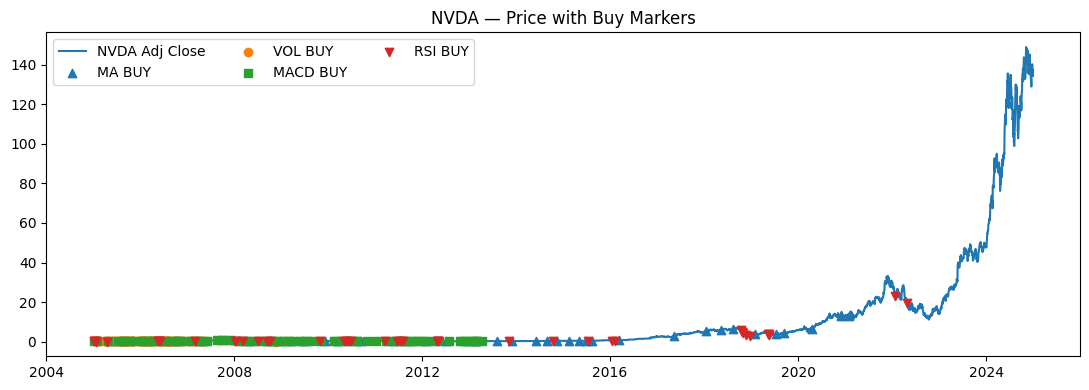

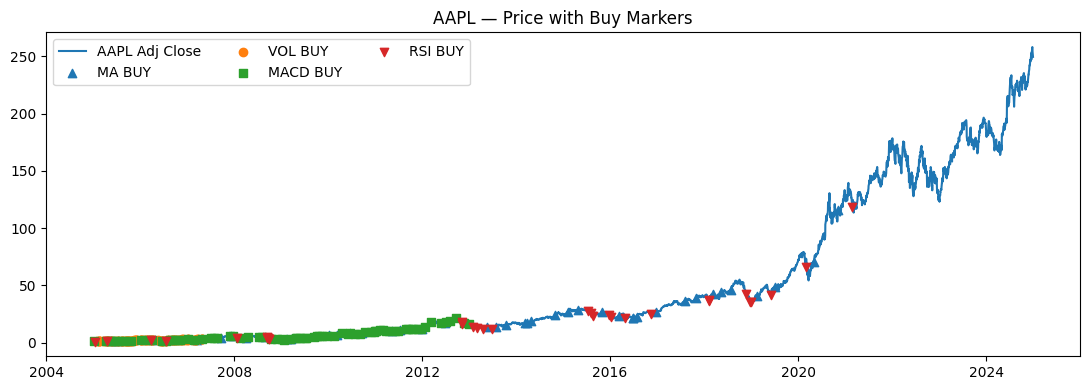

In [310]:
def get_buys(df, ticker):
    # robust: accept either 'side' or 'action', require 'date' and 'ticker'
    if df is None or df.empty: 
        return pd.DatetimeIndex([])
    side_col = "side" if "side" in df.columns else ("action" if "action" in df.columns else None)
    if side_col is None or "ticker" not in df.columns or "date" not in df.columns:
        return pd.DatetimeIndex([])
    mask = (df[side_col] == "BUY") & (df["ticker"] == ticker)
    return pd.to_datetime(df.loc[mask, "date"], errors="coerce").dropna().unique()

def plot_signal_overlay(ticker):
    px = load_price_series(ticker, PRICE_COL)
    plt.figure(figsize=(11,4))
    plt.plot(px.index, px.values, label=f"{ticker} {PRICE_COL}")

    markers = {"Benchmark":"x", "MA":"^", "VOL":"o", "MACD":"s", "RSI":"v"}
    for name, tr in TRADES.items():
        dates = get_buys(tr, ticker)     # <-- use the function arg
        if len(dates):
            plt.scatter(dates, px.reindex(dates), 
                        marker=markers.get(name,"o"), s=36, label=f"{name} BUY", zorder=3)

    plt.title(f"{ticker} — Price with Buy Markers")
    plt.legend(ncol=3); plt.tight_layout(); plt.show()

# example
plot_signal_overlay("NVDA")

plot_signal_overlay("AAPL")

## Holdings over time

### benchmark strategy - holdings/cash/equity

The cash is a straight horizontal line since we invest and deploy all cash into all investable assets in 2005 such that there is nothing happened in cash. For holdings, since the time span 20 years with an obvious uptrends, which may be led by the information and AI age. From the chart below of holdings, we can find there are three main drawdowns corresponding to 2008(financial crisis,) 2020 covid period, and 2022 bear market.

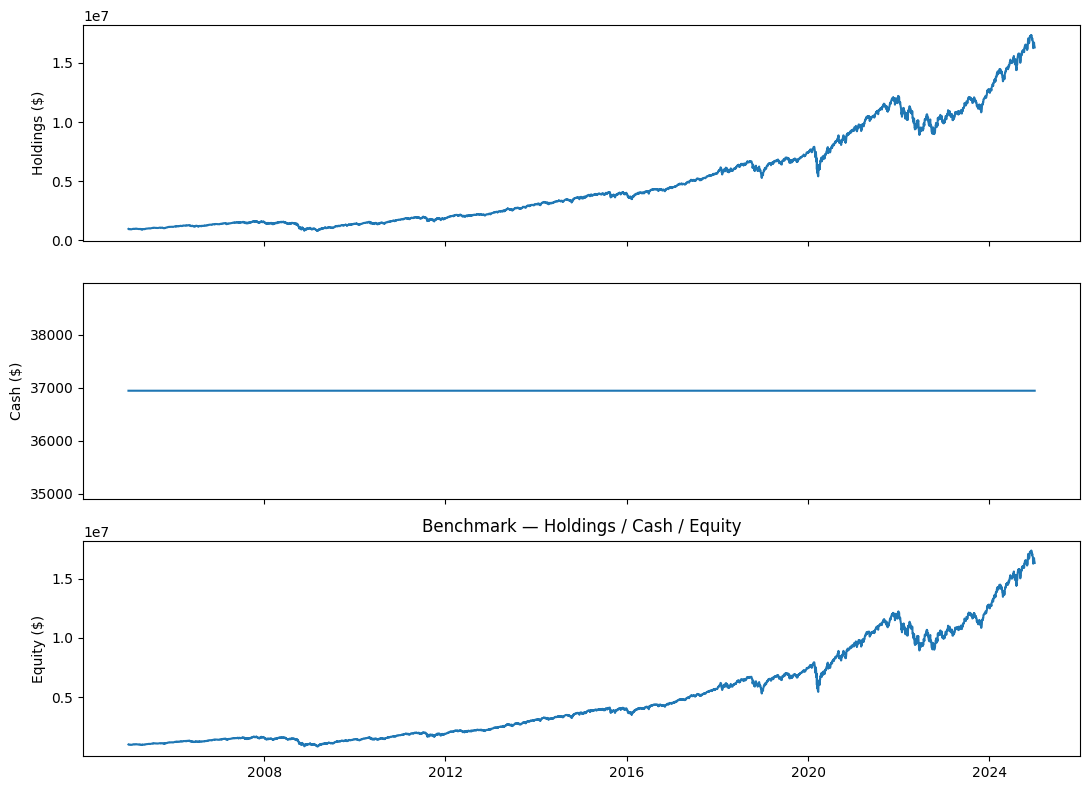

In [314]:
def plot_hce(name):
    df = PORTS[name][["holdings","cash","equity"]].dropna(how="all")
    fig, ax = plt.subplots(3,1, figsize=(11,8), sharex=True)
    ax[0].plot(df.index, df["holdings"]); ax[0].set_ylabel("Holdings ($)")
    ax[1].plot(df.index, df["cash"]);     ax[1].set_ylabel("Cash ($)")
    ax[2].plot(df.index, df["equity"]);   ax[2].set_ylabel("Equity ($)")
    ax[2].set_title(f"{name} — Holdings / Cash / Equity")
    plt.tight_layout(); plt.show()
plot_hce("Benchmark")


### Moving average strategy

There is an contrast direction for the chart of holdings and cash: as teh holdings go up, the cash goes down. This is because as we invest, the cash will decrease for sure, and the while bull market happened. And similar drawdowns happened as we talked above.

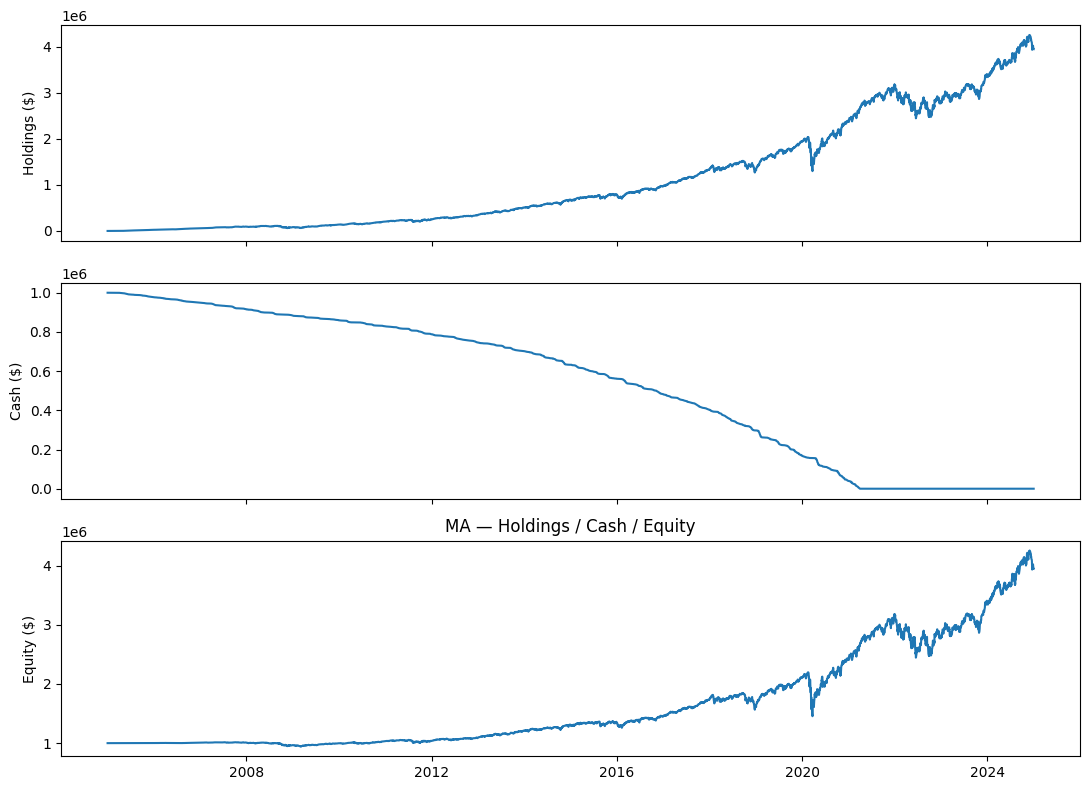

In [303]:
plot_hce("MA")


### Volatility breakout strategy

The cash line goes down in the very beginning, which means the the volatility strategy works will initially and is around 2008 when the market is volatile--the daily moves exceeded the rolling sigma threshold frequently. Also, that means the the strategy finishes deploying really early, since here we only consider the buy action.
On teh other hand, similar drawdown appears in the chart,as above strategies.

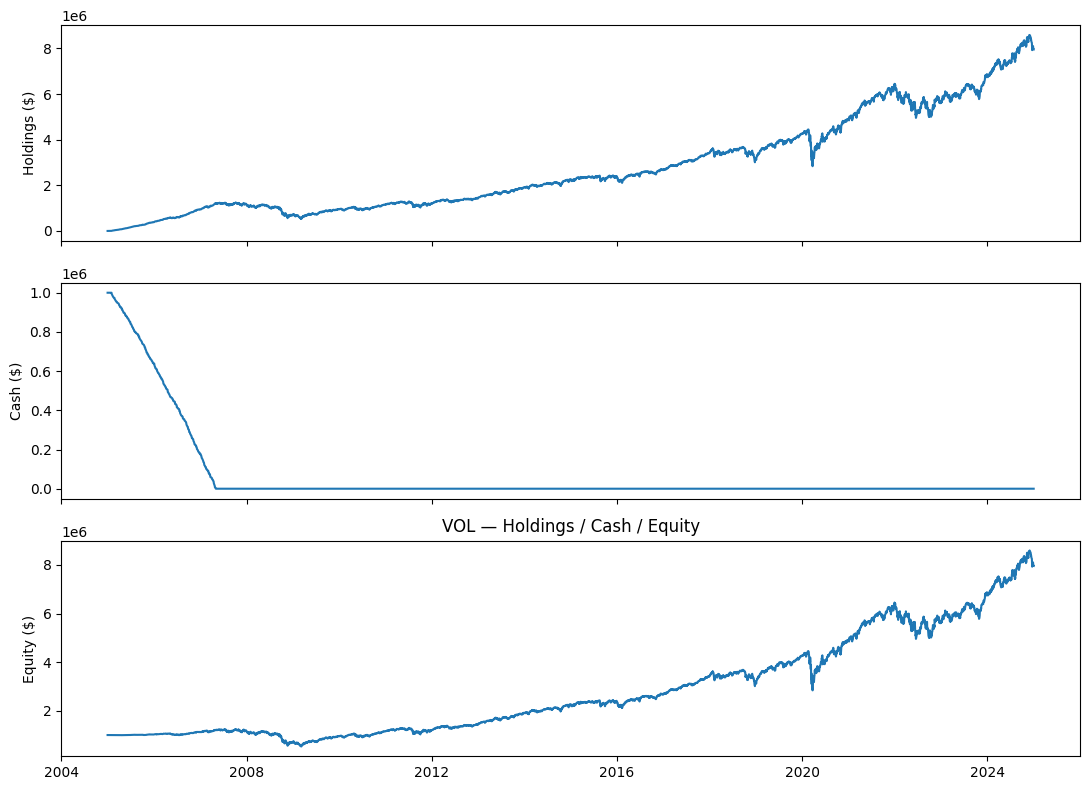

In [305]:
plot_hce("VOL")

### MACD strategy

we can see the cash also decrease in the relatively early stage(but not as early as Volatility strategy), which might also be teh reason why the pnl lines of MACD is similar to the volatility breakout strategy. 

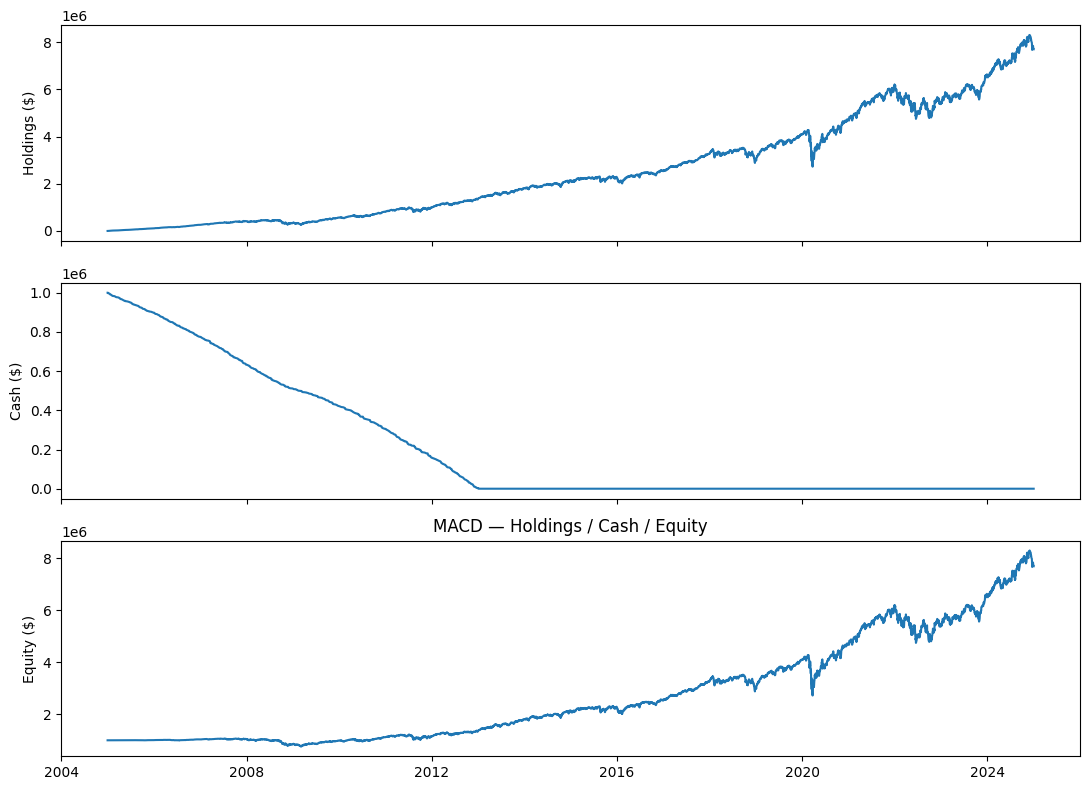

In [316]:
plot_hce("MACD")

### RSI

We can see the cash is used up really late and the total onl is not so much as previous strategies.

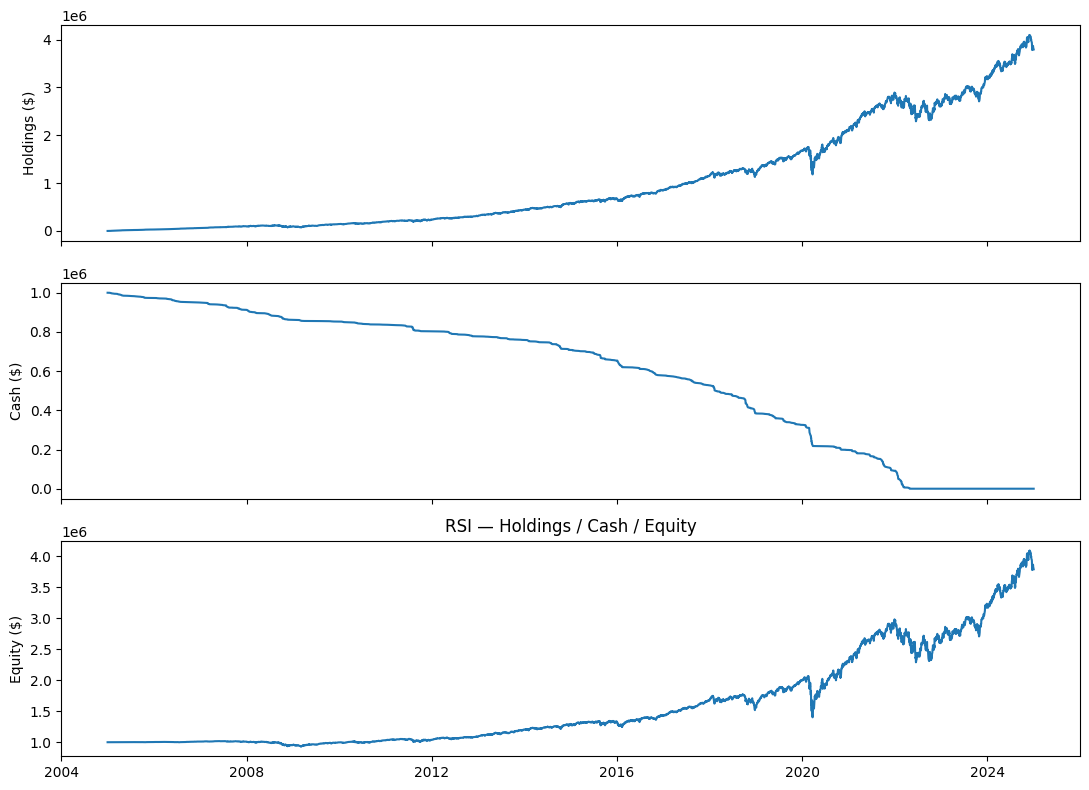

In [315]:
plot_hce("RSI")

## Cumulative PnL comparison across strategies

VOL (green) and MACD (red) are the strongest of the signals. Both are trend/momentum-ish, both suffer in 2008–09 (GFC), 2020 (COVID crash), 2022 (bear market), then recover with trends.


MA (orange) and RSI (purple) are lowest:

- MA(20>50) trades only on cross events; between events we don’t add exposure so more cash drag.

- RSI(oversold) is mean-reversion; it buys into drawdowns and benefits from rebounds, but stays under-invested most of the time.

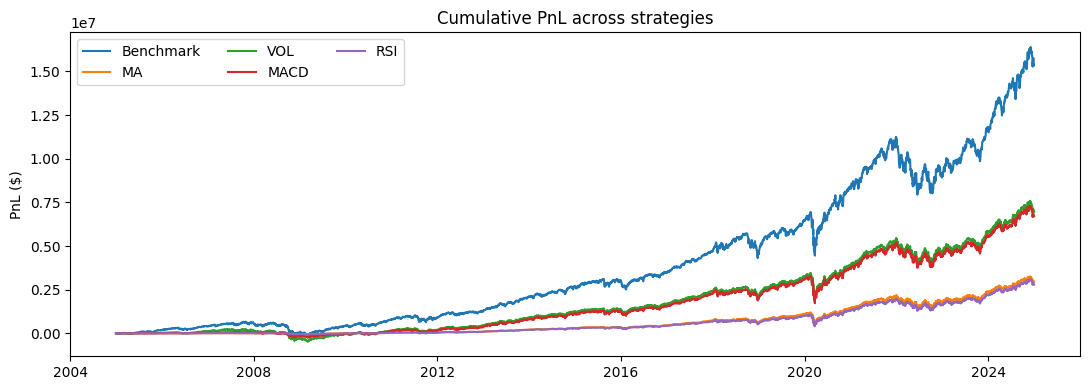

In [317]:

# align equity series on the shared calendar
eq_panel = pd.concat({n: PORTS[n]["equity"] for n in PORTS if not PORTS[n].empty}, axis=1).dropna(how="all")
pnl = eq_panel - INIT_CASH

plt.figure(figsize=(11,4))
for n in pnl.columns:
    plt.plot(pnl.index, pnl[n], label=n)
plt.title("Cumulative PnL across strategies")
plt.ylabel("PnL ($)")
plt.legend(ncol=3); plt.tight_layout(); plt.show()


## Sumamry

In [319]:
def summary_stats(equity: pd.Series, init_cash=INIT_CASH):
    equity = equity.dropna()
    pnl = equity.iloc[-1] - init_cash if not equity.empty else np.nan
    ret = equity.pct_change().dropna()
    ann = (1 + ret.mean())**252 - 1 if not ret.empty else np.nan
    vol = ret.std() * np.sqrt(252) if not ret.empty else np.nan
    sharpe = ann/vol if vol and vol!=0 else np.nan
    mdd = (equity / equity.cummax() - 1).min() if not equity.empty else np.nan
    return pd.Series({"FinalPnL": pnl, "AnnRet": ann, "AnnVol": vol, "Sharpe": sharpe})

summary = pd.concat({n: summary_stats(PORTS[n]["equity"]) for n in PORTS if "equity" in PORTS[n]}, axis=1).T
summary


,FinalPnL,AnnRet,AnnVol,Sharpe
Benchmark,1.534012e+07,0.172005,0.193760,0.887725
MA,2.948102e+06,0.078244,0.114343,0.684294
VOL,6.956580e+06,0.130661,0.194443,0.671972
MACD,6.696048e+06,0.120336,0.151075,0.796528
RSI,2.791500e+06,0.075680,0.111360,0.679594


From the table above and the chart I plot above, we can find PNL of benchmark(static strategy) is the highest; pnl of MACD strategy is similar to that of Volatility Breakout Strategy; meanwhile, the RSI strategy move close to the moving average strategy. The reason may be because we are investigating the long time range such that there exists many volatile things, especially such period is information age, as we can see the sharpe ratio of benchmark is also the highest. 

